In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('dataset/keparahan5_7_2_train.csv')
df.head()

,No Document,title,Description,Mati,Luka,hilang,tenggelam,pesawat,Keparahan
0,0,"Depresi, Seorang Wanita Sengaja Tabrakkan Diri...",\- Seorang wanita tewas tertabrak kereta api (...,1.0,0.0,0.0,0.0,0,sedang
1,1,Lion Air,\- Bandara Jalaludin Gorontalo ditutup sementa...,0.0,0.0,0.0,0.0,1,parah
2,2,"Sopir Ngantuk, Penyebab Kecelakaan Beruntun Te...",\-\n\nKecelakaan beruntun melibatkan 3 kendara...,2.0,1.0,0.0,0.0,0,sedang
3,3,"Bruk! Tabrak Polisi Saat Dirazia, Supriadi Dih...","\- Bukannya menghentikan laju kendaraannya, Su...",0.0,1.0,0.0,0.0,0,rendah
4,4,"Gagal Nanjak ke Tol Cempaka Putih, Truk Tabrak...",\-\n\nSatu unit truk trailer menabrak mobil di...,0.0,0.0,0.0,0.0,0,rendah


In [3]:
df.drop(columns=["No Document", "title", "Description"], inplace=True)

In [4]:
from jcopml.plot import plot_missing_value

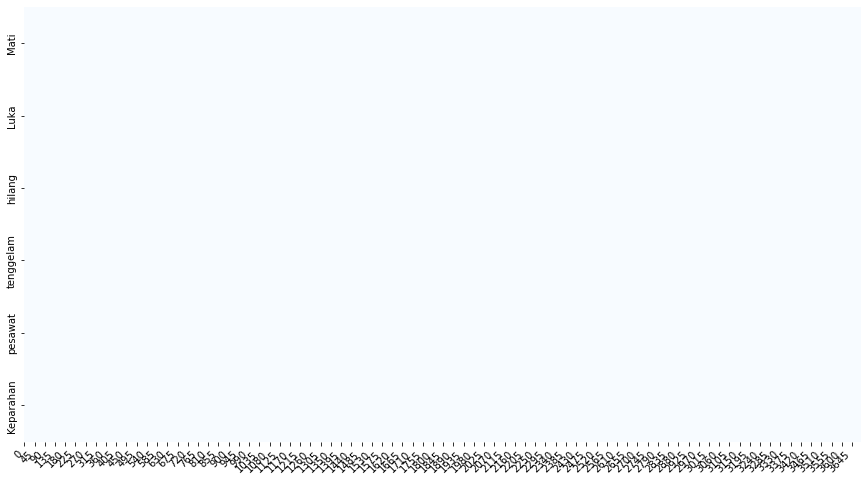

In [5]:
plot_missing_value(df)

In [6]:
data =df.dropna()

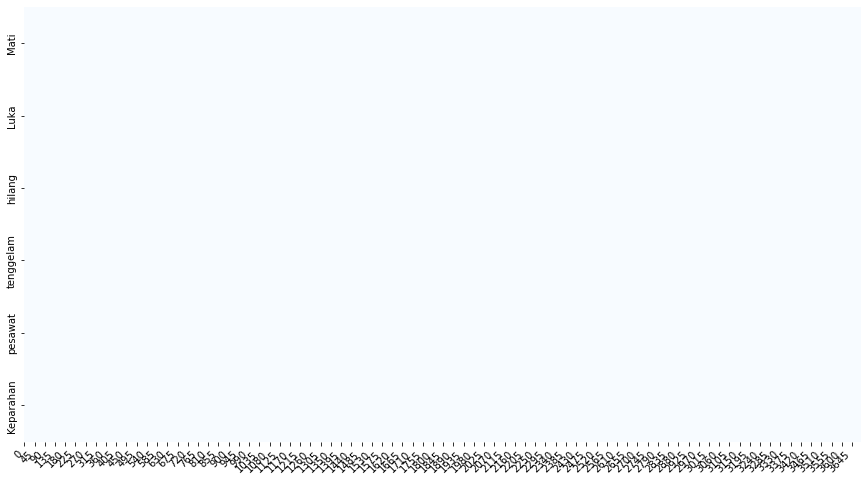

In [7]:
plot_missing_value(data)

In [8]:
data.head()

,Mati,Luka,hilang,tenggelam,pesawat,Keparahan
0,1.0,0.0,0.0,0.0,0,sedang
1,0.0,0.0,0.0,0.0,1,parah
2,2.0,1.0,0.0,0.0,0,sedang
3,0.0,1.0,0.0,0.0,0,rendah
4,0.0,0.0,0.0,0.0,0,rendah


In [9]:
data.Keparahan.value_counts()

sedang    2027
rendah    1242
parah      417
Name: Keparahan, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
data['Keparahan_n'] = LabelEncoder().fit_transform(data['Keparahan'])
data.head()

,Mati,Luka,hilang,tenggelam,pesawat,Keparahan,Keparahan_n
0,1.0,0.0,0.0,0.0,0,sedang,2
1,0.0,0.0,0.0,0.0,1,parah,0
2,2.0,1.0,0.0,0.0,0,sedang,2
3,0.0,1.0,0.0,0.0,0,rendah,1
4,0.0,0.0,0.0,0.0,0,rendah,1


In [12]:
X= data.drop(['Keparahan','Keparahan_n'], axis='columns')
y= data['Keparahan_n']
# X= data.drop(['Keparahan'], axis='columns')
# y= data['Keparahan']


In [13]:
y

0       2
1       0
2       2
3       1
4       1
       ..
3681    2
3682    1
3683    2
3684    2
3685    2
Name: Keparahan_n, Length: 3686, dtype: int32

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
d_tree = DecisionTreeClassifier()

In [16]:
d_tree.fit(X,y)

DecisionTreeClassifier()

In [17]:
d_tree.score(X,y)

1.0

# Split Dataset

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X= data.drop(['Keparahan','Keparahan_n'], axis='columns')
y= data['Keparahan_n']
# X= data.drop(['Keparahan'], axis='columns')
# y= data['Keparahan']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)
#test_size diganti 0.1

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2948, 5), (738, 5), (2948,), (738,))

In [22]:
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [23]:
# def train_using_gini(X_train, X_test, y_train):
      
#     # Creating the classifier object
#     clf_gini = DecisionTreeClassifier(criterion = "gini")
  
#     # Performing training
#     clf_gini.fit(X_train, y_train)
# #     print('gini : ',clf_gini)
#     return clf_gini
      
# # Function to perform training with entropy.
# def tarin_using_entropy(X_train, X_test, y_train):
  
#     # Decision tree with entropy
#     clf_entropy = DecisionTreeClassifier(criterion = "entropy")
  
#     # Performing training
#     clf_entropy.fit(X_train, y_train)
# #     print('ent : ',clf_entropy)
#     return clf_entropy

In [24]:
# clf_gini = train_using_gini(X_train, X_test, y_train)
# # clf_entropy = tarin_using_entropy(X_train, X_test, y_train)

In [25]:
# clf_gini.score(X_test,y_test)

In [26]:
# clf_entropy.score(X_test,y_test)

In [27]:
# plt.rcParams['figure.dpi'] =85
# plt.subplots(figsize=(50,30))
# tree.plot_tree(clf_gini, fontsize=13)
# plt.show()

In [28]:
# plt.rcParams['figure.dpi'] =85
# plt.subplots(figsize=(50,30))
# tree.plot_tree(clf_entropy, fontsize=13)
# plt.show()

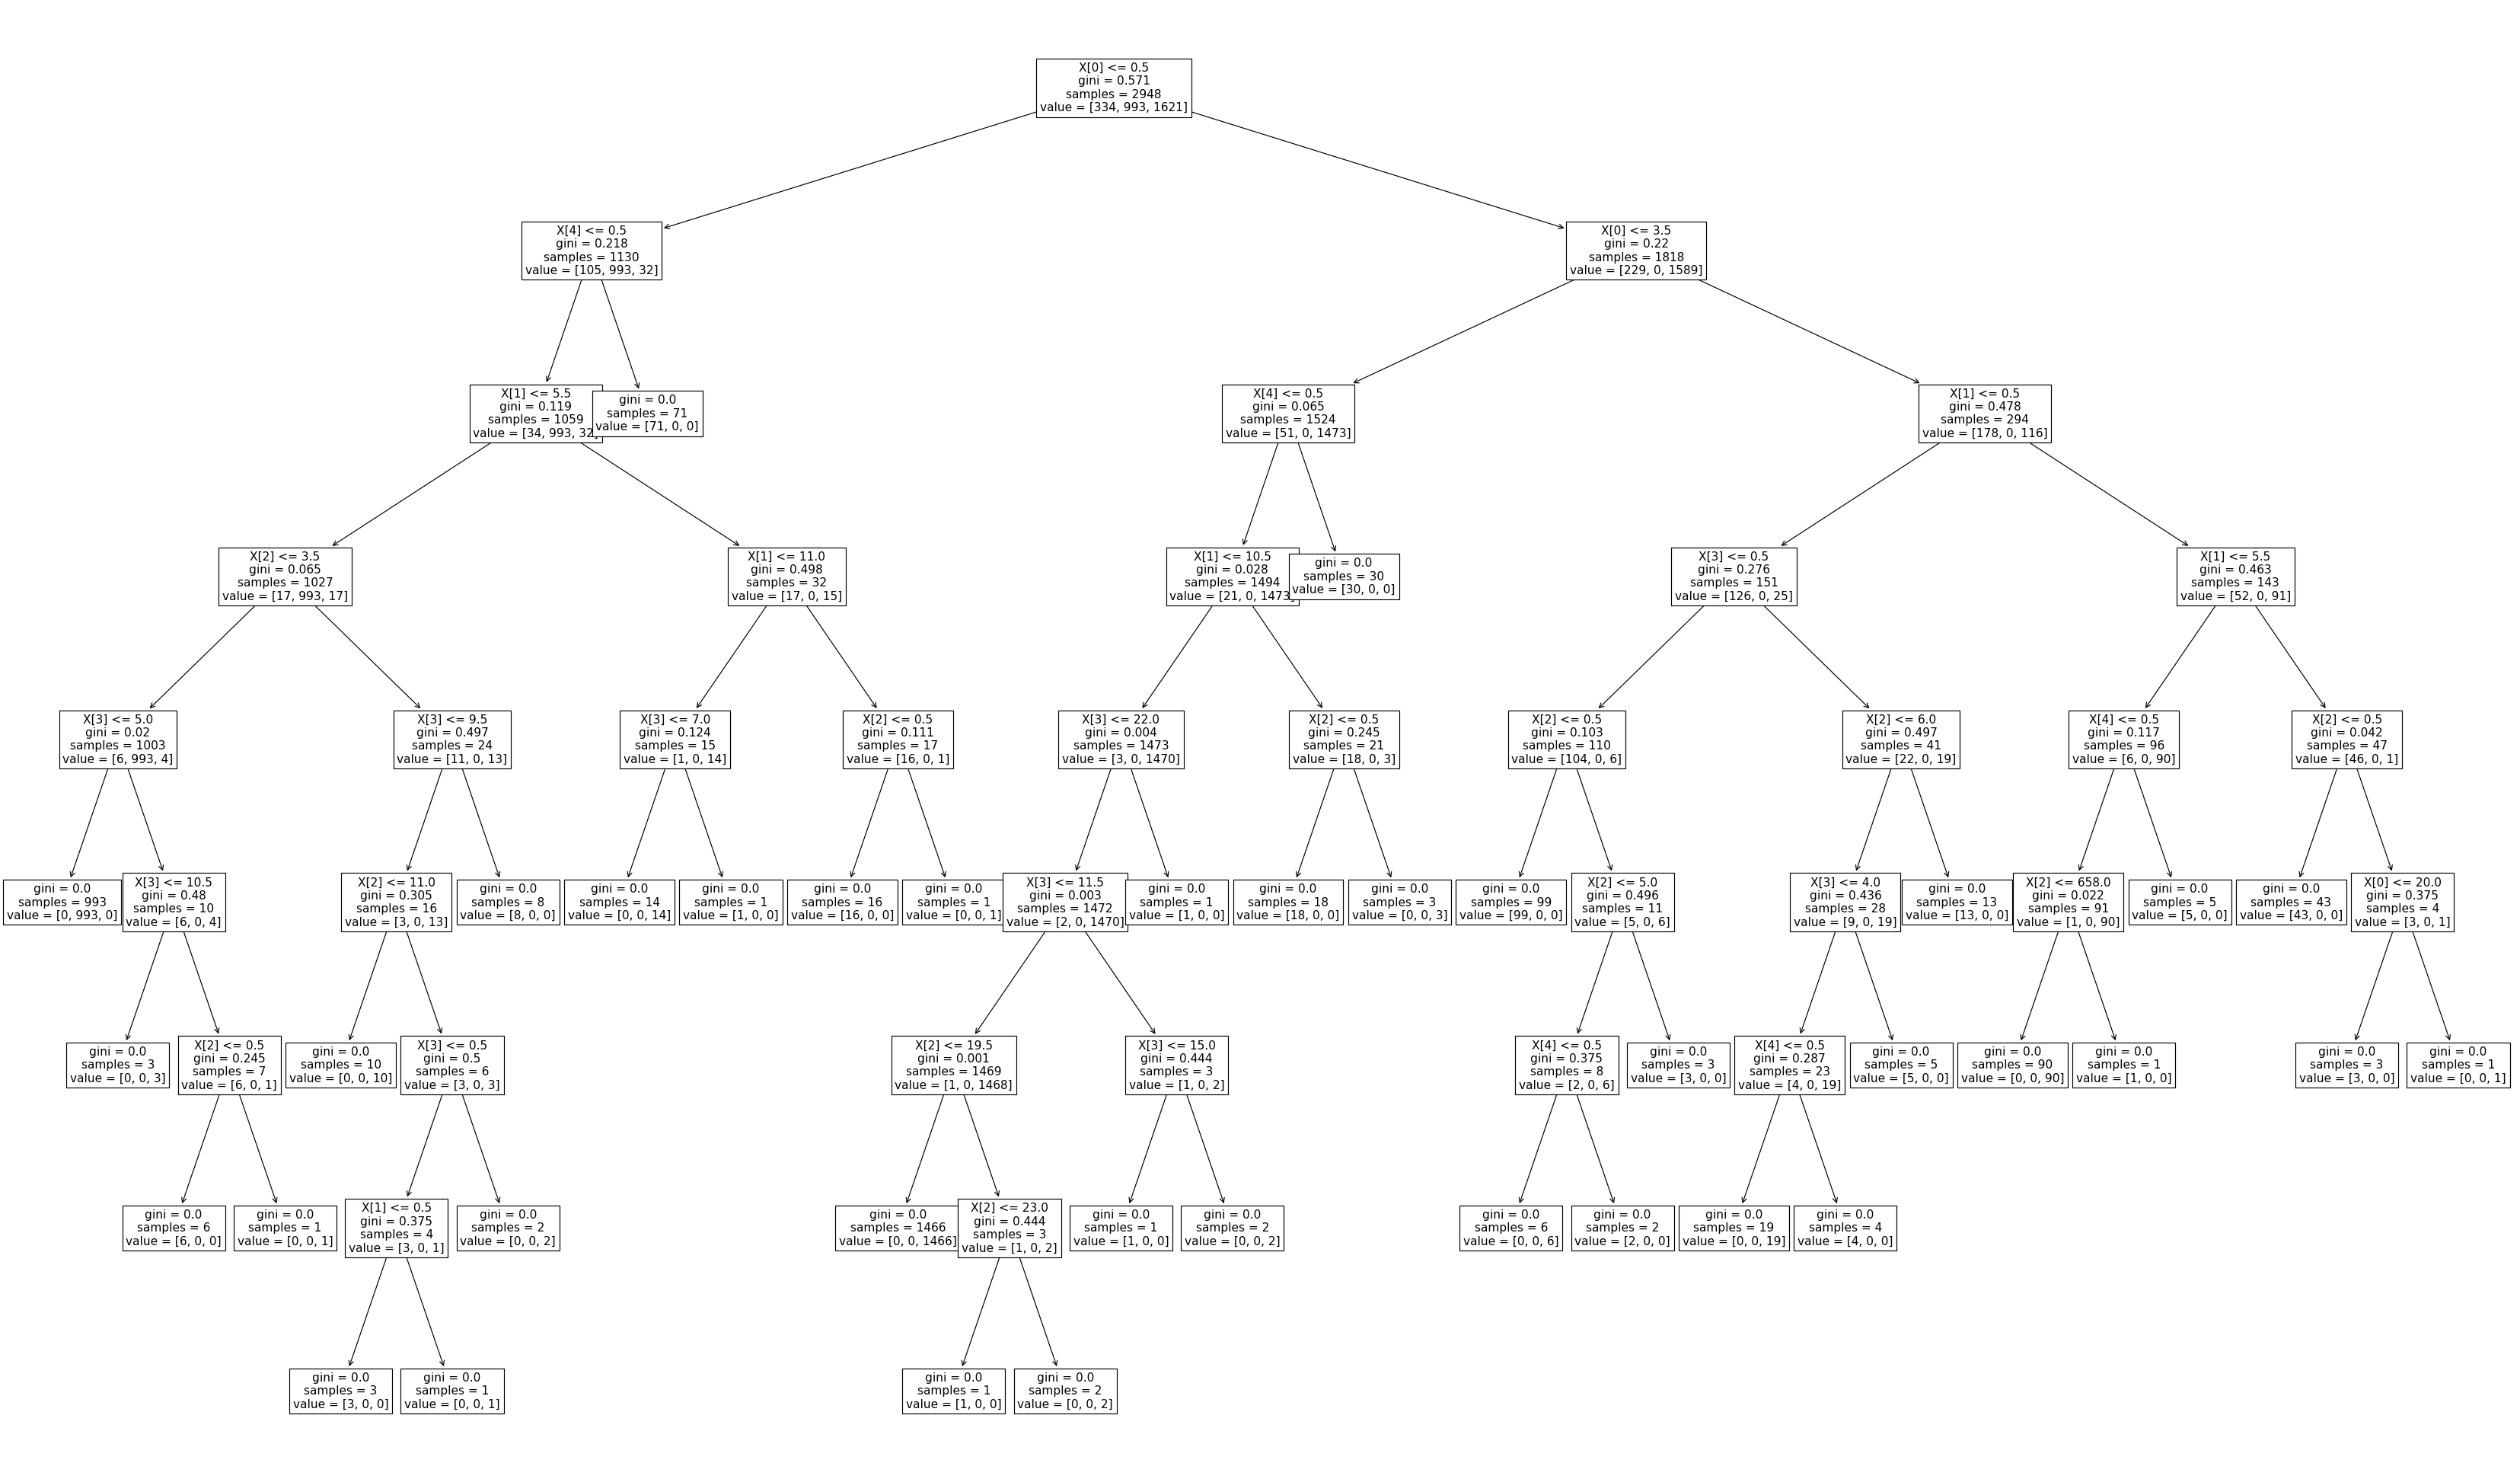

In [47]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train.values,y_train.values)
y_pred = d_tree.predict(X_test.values)
plt.rcParams['figure.dpi'] =85
plt.subplots(figsize=(50,30))
tree.plot_tree(d_tree, fontsize=13)
plt.show()

In [48]:
# y_pred_gini = clf_gini.predict(X_test)
# y_pred_entropy = clf_entropy.predict(X_test)

NameError: name 'clf_gini' is not defined

In [49]:
# cm_gini=confusion_matrix(y_test,y_pred_gini)
# cm_df_gini = pd.DataFrame(cm_gini,
#                      index = ['rendah','sedang','parah'], 
#                      columns = ['rendah','sedang','parah'])
# plt.figure(figsize=(13,7))
# plt.title("Confusion Matrix")
# sns.heatmap(cm_df_gini, annot=True,fmt='d', cmap='Reds')
# plt.ylabel("Actual Values")
# plt.xlabel("Predicted Values")
# plt.savefig('confusion_matrix.png')

NameError: name 'y_pred_gini' is not defined

In [32]:
# cm_entropy=confusion_matrix(y_test,y_pred_entropy)
# cm_df_entropy = pd.DataFrame(cm_entropy,
#                      index = ['rendah','sedang','parah'], 
#                      columns = ['rendah','sedang','parah'])
# plt.figure(figsize=(13,7))
# plt.title("Confusion Matrix")
# sns.heatmap(cm_df_entropy, annot=True,fmt='d', cmap='Reds')
# plt.ylabel("Actual Values")
# plt.xlabel("Predicted Values")
# plt.savefig('confusion_matrix.png')

In [33]:
# print(classification_report(y_test,y_pred))

In [34]:
d_tree.score(X_test,y_test) #abis ini ngebikin .pkl

d:\HERRI\Tugas Akhir\pra\geographical_news_scrapper\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.9932249322493225

d:\HERRI\Tugas Akhir\pra\geographical_news_scrapper\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


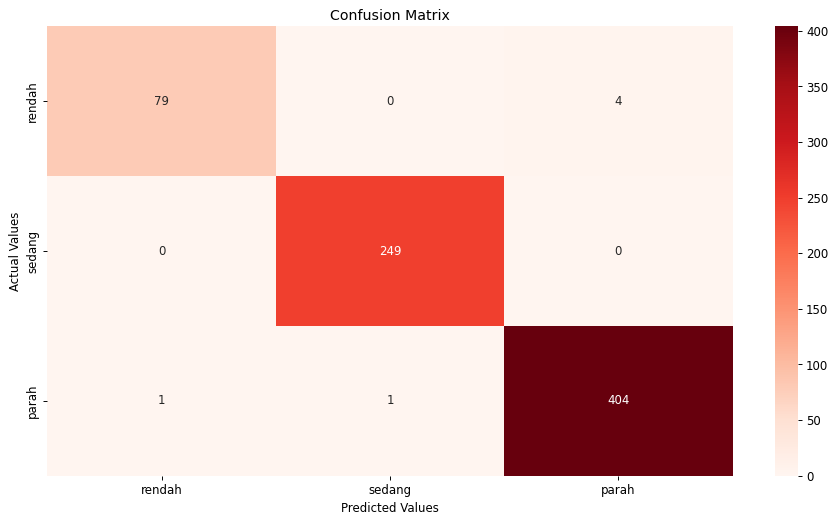

In [50]:
y_pred_dtree = d_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dtree)
cm_df = pd.DataFrame(cm,
                     index = ['rendah','sedang','parah'], 
                     columns = ['rendah','sedang','parah'])
plt.figure(figsize=(13,7))
plt.title("Confusion Matrix")
sns.heatmap(cm_df, annot=True,fmt='d', cmap='Reds')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [43]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
clf.fit(X_train.values,y_train.values) 

SVC(kernel='linear')

In [44]:
clf.score(X_test,y_test)

d:\HERRI\Tugas Akhir\pra\geographical_news_scrapper\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.9363143631436315

d:\HERRI\Tugas Akhir\pra\geographical_news_scrapper\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


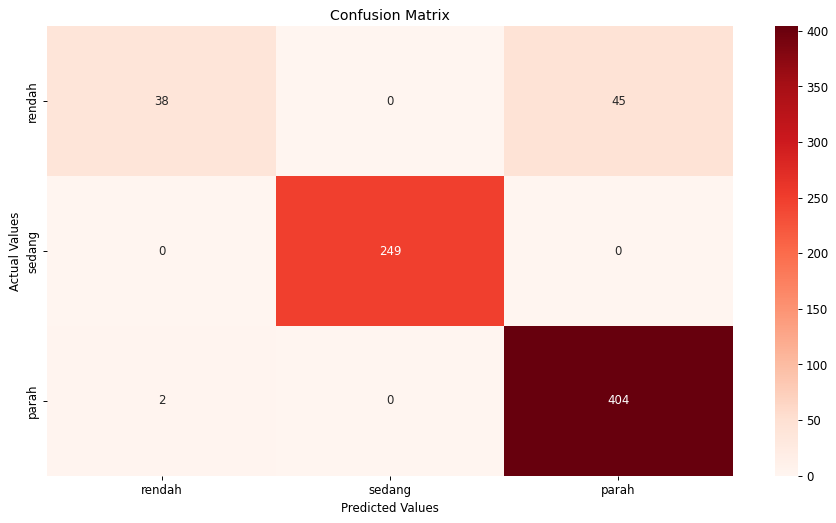

In [53]:
y_pred_svm = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_svm)
cm_df = pd.DataFrame(cm,
                     index = ['rendah','sedang','parah'], 
                     columns = ['rendah','sedang','parah'])
plt.figure(figsize=(13,7))
plt.title("Confusion Matrix")
sns.heatmap(cm_df, annot=True,fmt='d', cmap='Reds')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train.values,y_train.values) 

KNeighborsClassifier()

In [46]:
knn.score(X_test,y_test)

d:\HERRI\Tugas Akhir\pra\geographical_news_scrapper\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.967479674796748

d:\HERRI\Tugas Akhir\pra\geographical_news_scrapper\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


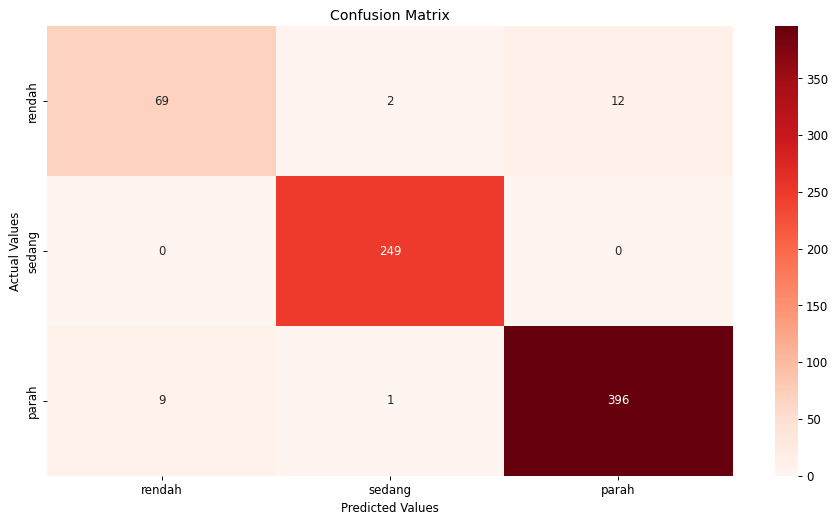

In [54]:
y_pred_knn = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)
cm_df = pd.DataFrame(cm,
                     index = ['rendah','sedang','parah'], 
                     columns = ['rendah','sedang','parah'])
plt.figure(figsize=(13,7))
plt.title("Confusion Matrix")
sns.heatmap(cm_df, annot=True,fmt='d', cmap='Reds')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [35]:
hasil=d_tree.predict([[0,0,0,0,0]])
print(hasil)

[1]


In [36]:
import joblib

In [37]:
# joblib.dump(d_tree,'d_tree_model2.pkl') #INI BUAT GENERATE

# GridSearchCV

In [38]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# K-Fold

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
d_tree = DecisionTreeClassifier()
cross_val_score(d_tree, X, y, cv=10)

array([1.        , 0.99457995, 0.99728997, 0.99186992, 0.99728997,
       0.99728997, 0.98097826, 0.98913043, 0.99456522, 1.        ])

In [41]:
cross_val_score(d_tree, X, y, cv=10).mean()

0.9940276304936961